# Build Voting Classifier Models

## Import Processed Data

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# not sure which classifier is triggering deprecation warnings,
# but until I figure that out, let's suppress them
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
# set path of the processed data
processed_data_path = Path.cwd().parent / 'data' / 'processed'
train_processed_file_path = processed_data_path /'train_processed.csv'
test_processed_file_path = processed_data_path / 'test_processed.csv'
unlabeled_processed_file_path = processed_data_path / 'unlabeled_processed.csv'

# create data frames for train, test, and unlabled data
train_df = pd.read_csv(train_processed_file_path, index_col = 'ImageId')
test_df = pd.read_csv(test_processed_file_path, index_col = 'ImageId')
unlabeled_df = pd.read_csv(unlabeled_processed_file_path, index_col = 'ImageId')

In [3]:
# in the train and test data, X contains all the columns except 'label'
# y is 'label'
X_train = train_df.drop(['label'], axis = 1)
y_train = train_df['label']
X_test = test_df.drop(['label'], axis = 1)
y_test = test_df['label']

## PCA

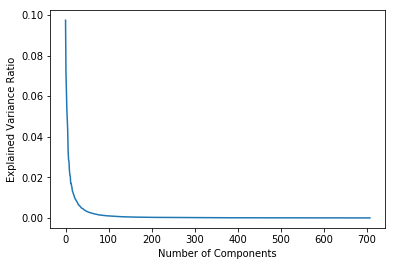

In [4]:
# let's look at how explained variance ratio varies with number of components
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(random_state = 42)
pca.fit(X_train)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [5]:
# it looks like we can get away with using about 50 components
pca = PCA(n_components = 50,
          random_state = 42).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
unlabeled_pca = pca.transform(unlabeled_df)

## Load persisted models

In [6]:
# create file paths
knn_model_file_path = Path.cwd().parent / 'models' / 'knn_model.pkl'
mlp_model_file_path = Path.cwd().parent / 'models' / 'mlp_model.pkl'
rbf_svc_model_file_path = Path.cwd().parent / 'models' / 'rbf_svc_model.pkl'
rf_model_file_path = Path.cwd().parent / 'models' / 'rf_model.pkl'

# load
knn_model = joblib.load(knn_model_file_path)
mlp_model = joblib.load(mlp_model_file_path)
rbf_svc_model = joblib.load(rbf_svc_model_file_path)
rf_model = joblib.load(rf_model_file_path)

## Hard Voting with KNN, MLP, RBF kernel SVC, and RF

In [7]:
# not sure what the warnings are about, but they are annoying
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# use 5-fold CV to evaluate accuracy with pca-train data
model = VotingClassifier(estimators = [('knn', knn_model),
                                       ('mlp', mlp_model),
                                       ('rbf_svc', rbf_svc_model),
                                       ('rf', rf_model)],
                         voting = 'hard')
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

CV accuracty mean: 0.979851
CV accuracty std: 0.001049
CV scores: [0.98007435 0.98155036 0.97841941 0.97916046 0.98005062]


/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Soft Voting with KNN, MLP, RBF kernel SVC, and RF

In [8]:
# use 5-fold CV to evaluate accuracy with pca-train data
model.voting = 'soft'
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

CV accuracty mean: 0.982976
CV accuracty std: 0.001490
CV scores: [0.98215613 0.98527005 0.98258669 0.98094671 0.98392139]


/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Hard Voting with KNN, MLP, and RBF kernel SVC

RF had the lowest accuracy, so maybe try voting without it.

In [11]:
# use 5-fold CV to evaluate accuracy with pca-train data
model = VotingClassifier(estimators = [('knn', knn_model),
                                       ('mlp', mlp_model),
                                       ('rbf_svc', rbf_svc_model)],
                         voting = 'hard')
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.983214
CV accuracty std: 0.001333
CV scores: [0.98260223 0.98527005 0.98273553 0.98139327 0.98407027]


## Soft Voting with KNN, MLP, and RBF kernel SVC

In [12]:
# use 5-fold CV to evaluate accuracy with pca-train data
model.voting = 'soft'
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.983423
CV accuracty std: 0.001321
CV scores: [0.98319703 0.98556762 0.98288436 0.98154213 0.98392139]


## Kaggle Score: 0.98314

Before we "go live" with this model (that is, submit its predictions to Kaggle), let's check how it performs on the test data, data that it has never seen and had no influence on its selection:

In [13]:
# fit model to entire train set
model = VotingClassifier(estimators = [('knn', knn_model),
                                       ('mlp', mlp_model),
                                       ('rbf_svc', rbf_svc_model)],
                         voting = 'soft').fit(X_train_pca, y_train)

# evaluate accuracy on test set
print('Voting Classifier (w/PCA) Accuracy: ' + '{0:2f}'.format(model.score(X_test_pca, y_test)))

Voting Classifier (w/PCA) Accuracy: 0.984762


In [14]:
# generate predictions
predictions = model.predict(unlabeled_pca)

# create a new data frame with two columns: ImageId and our predicted values for 'label'
submission_df = pd.DataFrame({'ImageId' : unlabeled_df.index, 'label' : predictions})

# write submission to disk...
# first define path
submission_file_path = Path.cwd().parent / 'data' / 'external' / 'voting_with_pca.csv'

# create the .csv file
# index is False since we don't want a third column
submission_df.to_csv(submission_file_path, index = False)

## Model Persistence

In [15]:
# Note: the PCA tool was persisted in the KNN notebook, so no need to do it again

# create file paths
model_file_path = Path.cwd().parent / 'models' / 'voting_model.pkl'

# persist the model and pca
joblib.dump(model, model_file_path);

#### Optional: Check the persisted model

In [16]:
# create file paths
pca_file_path = Path.cwd().parent / 'models' / 'pca_50.pkl'
model_file_path = Path.cwd().parent / 'models' / 'voting_model.pkl'

# load
pca_loaded = joblib.load(pca_file_path)
model_loaded = joblib.load(model_file_path)

In [17]:
# print the model object description
model_loaded

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [18]:
# print the pca object description
pca_loaded

PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
# transform the test data using loaded pca object
X_test_pca = pca_loaded.transform(X_test)

# calculate the score using the loaded model object
# we should get 0.984762, as above
print('Persisted Voting (w/PCA) Accuracy: ' + '{0:2f}'.format(model_loaded.score(X_test_pca, y_test)))

Persisted Voting (w/PCA) Accuracy: 0.984762


## Error Analysis

In [20]:
# imports
from sklearn.model_selection import cross_val_predict

In [21]:
# instead of scoring, get the cross-validated estimates for each image
y_train_pred = cross_val_predict(model, X_train_pca, y_train, cv = 5)

In [22]:
# now let's take a look at the confusion matrix to see
# which actual labels (rows) do not match the predicted label (columns)
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(np.matrix(conf_mx))

[[3285    0    1    1    1    1    8    0    7    2]
 [   0 3712    8    2    3    1    1    8    8    4]
 [   5    3 3293    6    4    0    2   15   11    3]
 [   0    1   18 3400    0   28    1    4   18   11]
 [   3    4    2    0 3204    1    8    4    2   30]
 [   4    0    1   24    1 2976   16    2    4    8]
 [   8    1    3    0    5    8 3280    0    4    0]
 [   3   16   16    3    6    1    0 3453    2   21]
 [   4    9    8   16    6   10    4    4 3178   11]
 [   7    2    5   13   23    6    3   22    7 3262]]


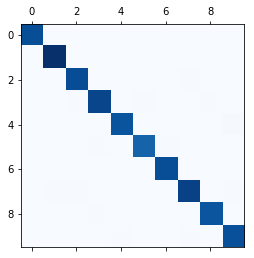

In [23]:
# color-coding might be easier to look at than a bunch of numbers:
# the darker, the bigger the value; the whiter, the smaller the value
plt.matshow(conf_mx, cmap = plt.cm.Blues);

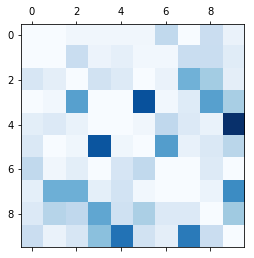

In [24]:
# well, this just confirms that the model is very accurate, which we already know...
# let's look at error rates by dividing by the number of images in each label (row sum)
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

# we only want errors, so let's fill the diagonal with zeros
np.fill_diagonal(norm_conf_mx, 0)

# plot
plt.matshow(norm_conf_mx, cmap = plt.cm.Blues);

As with the other models we've considered, the biggest problem is that many 4s are mislabeled as 9s. The following are pairs that are mislabeled in both directions: 4s and 9s, 3s and 5s, 2s and 7s, 3s and 8s, and 7s and 9s.

Other problems: 3s are mislabeled as 2s, 7s are mislabeled as 1s, and 5s are mislabeleds as 6s.

Remedies include those mentioned in the KNN notebook. At this point I feel like I need to take a deep dive into neural networks, so I think I'll put this project aside until I learn more.